In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the McDonald's dataset
mcdonalds = pd.read_csv('/content/mcdonalds.csv')

# Display column names
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [2]:
# Get dimensions of the dataset
print(mcdonalds.shape)

(1453, 15)


In [3]:
# Display the first three rows of the dataset
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [4]:
# Select columns 1 to 11 and convert them to a NumPy array
MD_x = mcdonalds.iloc[:, 0:11].values

# Convert 'Yes'/'No' values to binary (0/1)
MD_x = (MD_x == 'Yes').astype(int)

# Calculate the column-wise means
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [5]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)

# Print the explained variance ratio
print(pca.explained_variance_ratio_)


[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]


In [6]:
# Print the components
print(pca.components_)

# Print other relevant information
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.37593402  0.5

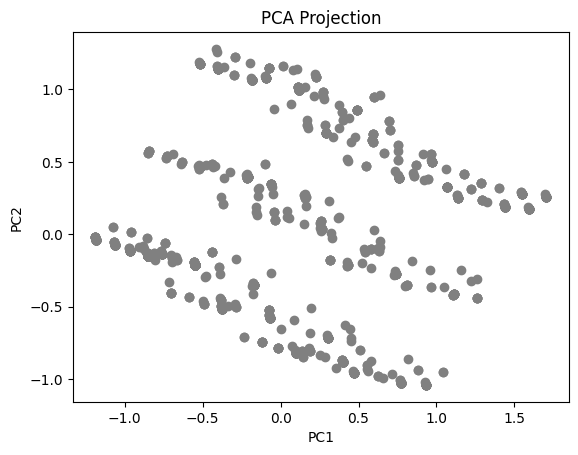

In [7]:
# Perform PCA
pca = PCA(n_components=2)  # 2 components for visualization
X_pca = pca.fit_transform(MD_x)

# Plotting PCA projection
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

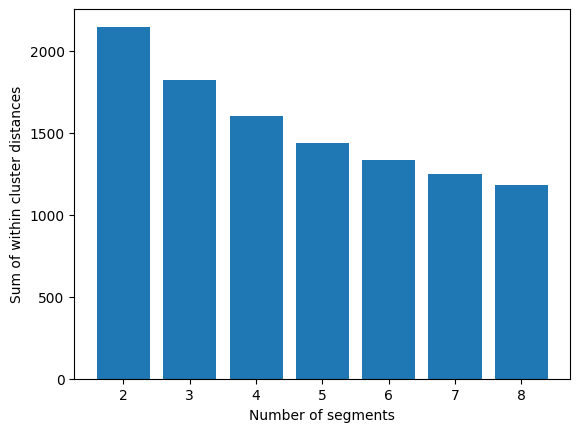

In [8]:
from sklearn.cluster import KMeans

# Perform KMeans clustering for 2 to 8 clusters
inertia = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(MD_x)
    inertia.append(kmeans.inertia_)

# Plotting the bar graph
plt.bar(range(2, 9), inertia)
plt.xlabel('Number of segments')
plt.ylabel('Sum of within cluster distances')
plt.show()

In [9]:
like_counts = mcdonalds['Like'].value_counts()
print(like_counts)

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64


In [11]:
# Applying KMeans with n_clusters=4
k4_model = KMeans(n_clusters=4, random_state=1234)
k4_model.fit(MD_x)

# Getting the cluster labels
k4 = k4_model.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


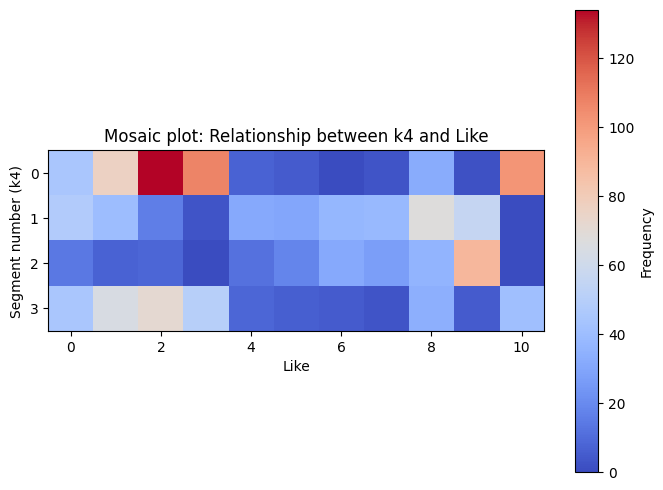

In [12]:
# Creating a cross-tabulation between k4 and the 'Like' column
cross_tab = pd.crosstab(k4, mcdonalds['Like'])

# Plotting a heatmap for visualization
plt.figure(figsize=(8, 6))
plt.imshow(cross_tab, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Frequency')
plt.xlabel('Like')
plt.ylabel('Segment number (k4)')
plt.title('Mosaic plot: Relationship between k4 and Like')
plt.show()

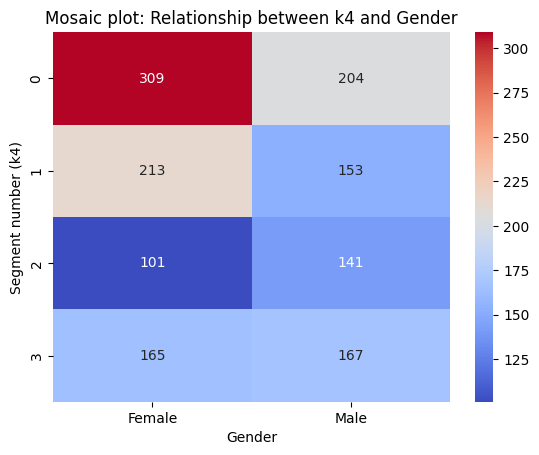

In [13]:
# Creating a cross-tabulation between k4 and the 'Gender' column
cross_tab_gender = pd.crosstab(k4, mcdonalds['Gender'])

# Creating a mosaic plot using seaborn
sns.heatmap(cross_tab_gender, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('Gender')
plt.ylabel('Segment number (k4)')
plt.title('Mosaic plot: Relationship between k4 and Gender')
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'VisitFrequency' column
mcdonalds['VisitFrequencyEncoded'] = label_encoder.fit_transform(mcdonalds['VisitFrequency'])

# Compute the mean VisitFrequency for each cluster
visit = mcdonalds['VisitFrequencyEncoded'].groupby(k4).mean()
print(visit)

0    2.614035
1    2.718579
2    2.706612
3    2.536145
Name: VisitFrequencyEncoded, dtype: float64


In [17]:
# Create a binary column for Female
mcdonalds['Female_binary'] = (mcdonalds['Gender'] == 'Female').astype(int)

# Calculate the mean of the binary Female column for each cluster
female = mcdonalds.groupby(k4)['Female_binary'].mean()
print(female)


0    0.602339
1    0.581967
2    0.417355
3    0.496988
Name: Female_binary, dtype: float64


In [10]:
# Python doesn't have a direct alternative for the flexclust, flexmix, partykit packages in R.
# Since some steps involve usage of those packages, few of the segmentation analysis steps cannot be converted from R to Python